In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [122]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [123]:
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)

df["price"] = boston.target

In [124]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [125]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [126]:
df[df.columns].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [127]:
deviation = df[df.columns].std()
mean = df[df.columns].mean()

min = mean - 3 * deviation
max = mean + 3 * deviation

filter = (df > min) & (df < max)
filter_outliers = (df < min) | (df > max)

In [128]:
df_filtered = df[filter]

In [129]:
df_outliers = df[filter_outliers]

In [130]:
df_outliers.notna().sum()

CRIM        8
ZN         14
INDUS       0
CHAS       35
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       5
price       0
dtype: int64

In [131]:
df_filtered = df_filtered.dropna()

In [132]:
df_filtered

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [133]:
y = df_filtered["price"]
X = df_filtered.drop("price", axis=1)

In [134]:
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [135]:
names = regressor.feature_names_in_.tolist()
values = regressor.coef_.tolist()

regressor_sorted = list(zip(names, values))

In [136]:
#regressor_sorted.sort(key=lambda x: x[1], reverse=True)
regressor_sorted.sort(key= lambda x: abs(x[1]), reverse=True)

In [137]:
values = [valor for nombre, valor in regressor_sorted]
nombres = [nombre for nombre, valor in regressor_sorted]

abs_values = [abs(valor) for nombre, valor in regressor_sorted]


fig 1


<Axes: >

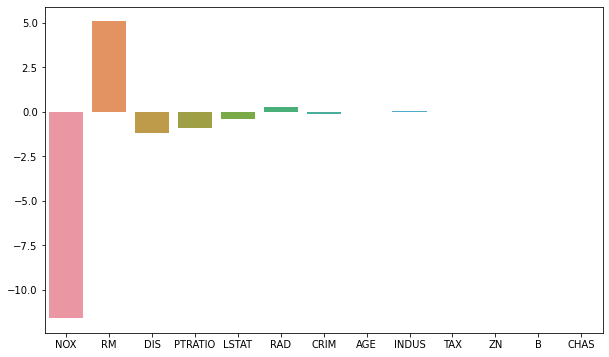

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

print("fig 1")

plt.figure(figsize=(10, 6))

sns.barplot(x=nombres, y=values)

fig 2


<Axes: >

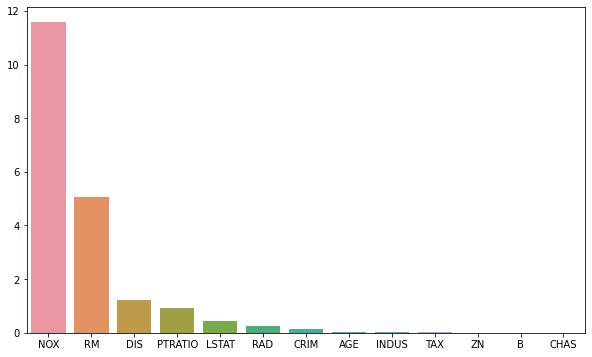

In [139]:
print("fig 2")

plt.figure(figsize=(10, 6))
sns.barplot(x=nombres, y=abs_values)

By using a linear regression we can see the relationships between the features and the target.

On fig one we can see the features orderes by the impact they have on the price. For example, the
amount nitric oxides concentration (NOX) reduces drastically the price when it rises a little.
On the other hand, the number of rooms (RM) are directly connected with the price.

fig 3


<Axes: xlabel='price', ylabel='Count'>

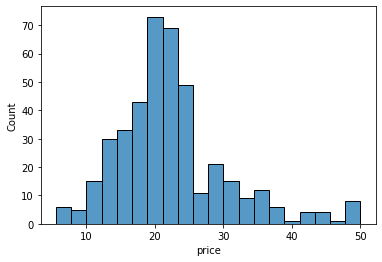

In [140]:
print("fig 3")
sns.histplot(data=df_filtered.price, bins=20)

fig 4


<Axes: xlabel='NOX', ylabel='price'>

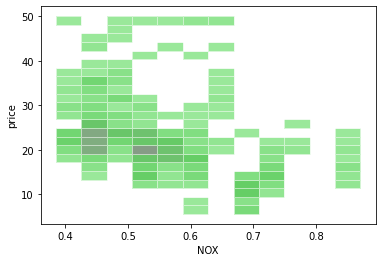

In [141]:
print("fig 4")
sns.histplot(data=df_filtered, x="NOX", y="price", alpha=0.6, edgecolors='w', color='green')

fig 5


<Axes: xlabel='RM', ylabel='price'>

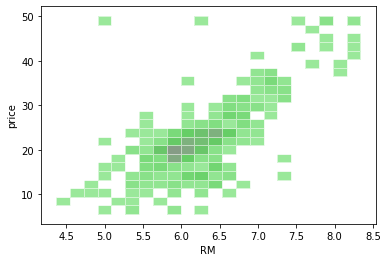

In [142]:
print("fig 5")
sns.histplot(data=df_filtered, x="RM", y="price", alpha=0.6, edgecolors='w', color='green')

fig 6


<Axes: xlabel='DIS', ylabel='price'>

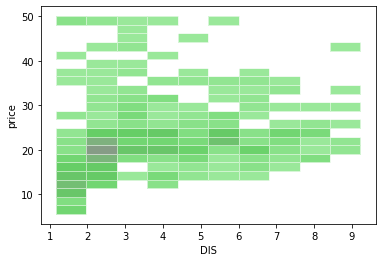

In [143]:
print("fig 6")
sns.histplot(data=df_filtered, x="DIS", y="price", alpha=0.6, edgecolors='w', color='green')

fig 7


<Axes: xlabel='PTRATIO', ylabel='price'>

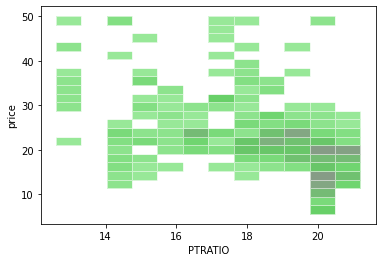

In [144]:
print("fig 7")
sns.histplot(data=df_filtered, x="PTRATIO", y="price", alpha=0.6, edgecolors='w', color='green')

fig 8


<Axes: xlabel='LSTAT', ylabel='price'>

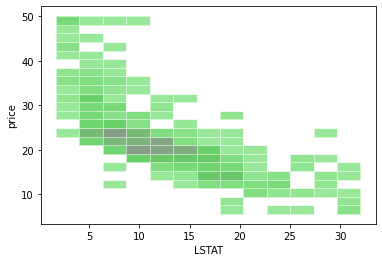

In [145]:
print("fig 8")
sns.histplot(data=df_filtered, x="LSTAT", y="price", alpha=0.6, edgecolors='w', color='green')

<Axes: xlabel='RAD', ylabel='price'>

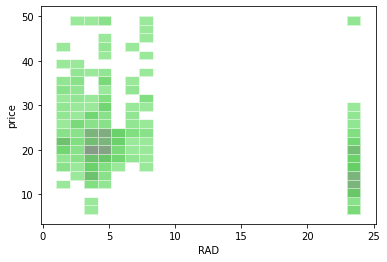

In [146]:
sns.histplot(data=df_filtered, x="RAD", y="price", alpha=0.6, edgecolors='w', color='green')

Linear Regression can show the importance of features, but we have to be careful using it, since
it can lead to missinterpretation due to the nonlinearities data can present. 

Now I will try to apply clustering to this data and then analyze the resultant clusters.

In [147]:
df_filtered.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.0,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.0,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.0,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.0,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.0,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.0,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.0,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


Looking at this descriction of the data we can see that we erased all values for CHAS distinct to 0 due to outliers were very related  to this feature. For the clustering we will keep the outliers and this feature. But first we will scale all the features except CHAS.

In [148]:
from sklearn.preprocessing import StandardScaler

y = df["price"]
X = df.drop("price", axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [149]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

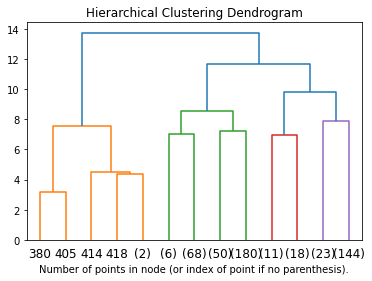

In [150]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(X_scaled)
plt.title("Hierarchical Clustering Dendrogram")


plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)


In [159]:
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score

min_cluster_sizes = range(2, 50, 5)
min_samples = range(5, 200, 10)

best_score = -1
best_parameters = {}
results_mem = pd.DataFrame(columns=["min_cluster_size", "min_samples", "score"])

for size in min_cluster_sizes:
    for sample in min_samples:
        model = hdbscan.HDBSCAN(min_cluster_size=size, min_samples=sample)
        labels = model.fit_predict(X)
        
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = {'min_cluster_size': size, 'min_samples': sample, 'silhouette_score': score}
            temp_df = pd.DataFrame({"min_cluster_size": [size], "min_samples": [sample], "score": [score]})
        else:
            temp_df = pd.DataFrame({"min_cluster_size": [size], "min_samples": [sample], "score": [-1.5]})
        
        results_mem = pd.concat([results_mem, temp_df], ignore_index=True)

print("Best score:", best_score)
print("Best parameters:", best_params)


Best score: 0.7227009586247696
Best parameters: {'min_cluster_size': 2, 'min_samples': 95, 'silhouette_score': 0.7227009586247696}


In [160]:
pivot_table = results_mem.pivot("min_cluster_size", "min_samples", "score")
pivot_table = pivot_table.astype(float)
pivot_table

c:\Users\jeste\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


min_samples,5,15,25,35,45,55,65,75,85,95,105,115,125,135,145,155,165,175,185,195
min_cluster_size,,,,,,,,,,,,,,,,,,,,
2,0.668341,0.704599,0.707002,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,0.486232,0.505114,0.541308,0.54818,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
7,0.627251,0.704599,0.707002,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,0.486232,0.505114,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
12,0.668341,0.704599,0.707002,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,0.486232,-1.500000,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
17,0.668341,0.704599,0.707002,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,0.486232,-1.500000,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
22,0.668341,0.704599,0.707002,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,-1.500000,-1.500000,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
27,0.668341,0.704599,0.707002,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,-1.500000,-1.500000,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
32,0.668341,0.704599,0.625619,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,-1.500000,-1.500000,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
37,0.691405,0.625619,0.625619,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,-1.500000,-1.500000,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5
42,0.691405,0.625619,0.625619,0.672799,0.714378,0.721963,0.721963,0.721963,0.721963,0.722701,-1.500000,-1.500000,-1.500000,-1.50000,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5


<Axes: xlabel='min_samples', ylabel='min_cluster_size'>

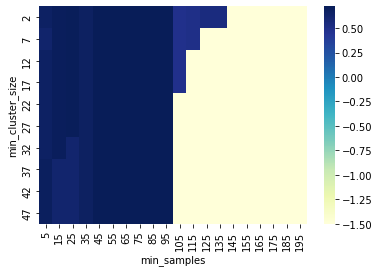

In [161]:
sns.heatmap(data=pivot_table, cmap="YlGnBu", fmt=".2f")